In [20]:
# Import Libraries
from init import *  # Adds project root to sys.path
from src import config

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
# Load data
train = pd.read_csv(config.DATA_PATH + 'raw/train.csv')

In [22]:
# Display data (First 5)
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [23]:
# Check column types & nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [24]:
# Check for missing values
train.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [25]:
# Quick overview of values in 'Sex' since it's an object / categorical
train['Sex'].value_counts()

Sex
female    375721
male      374279
Name: count, dtype: int64

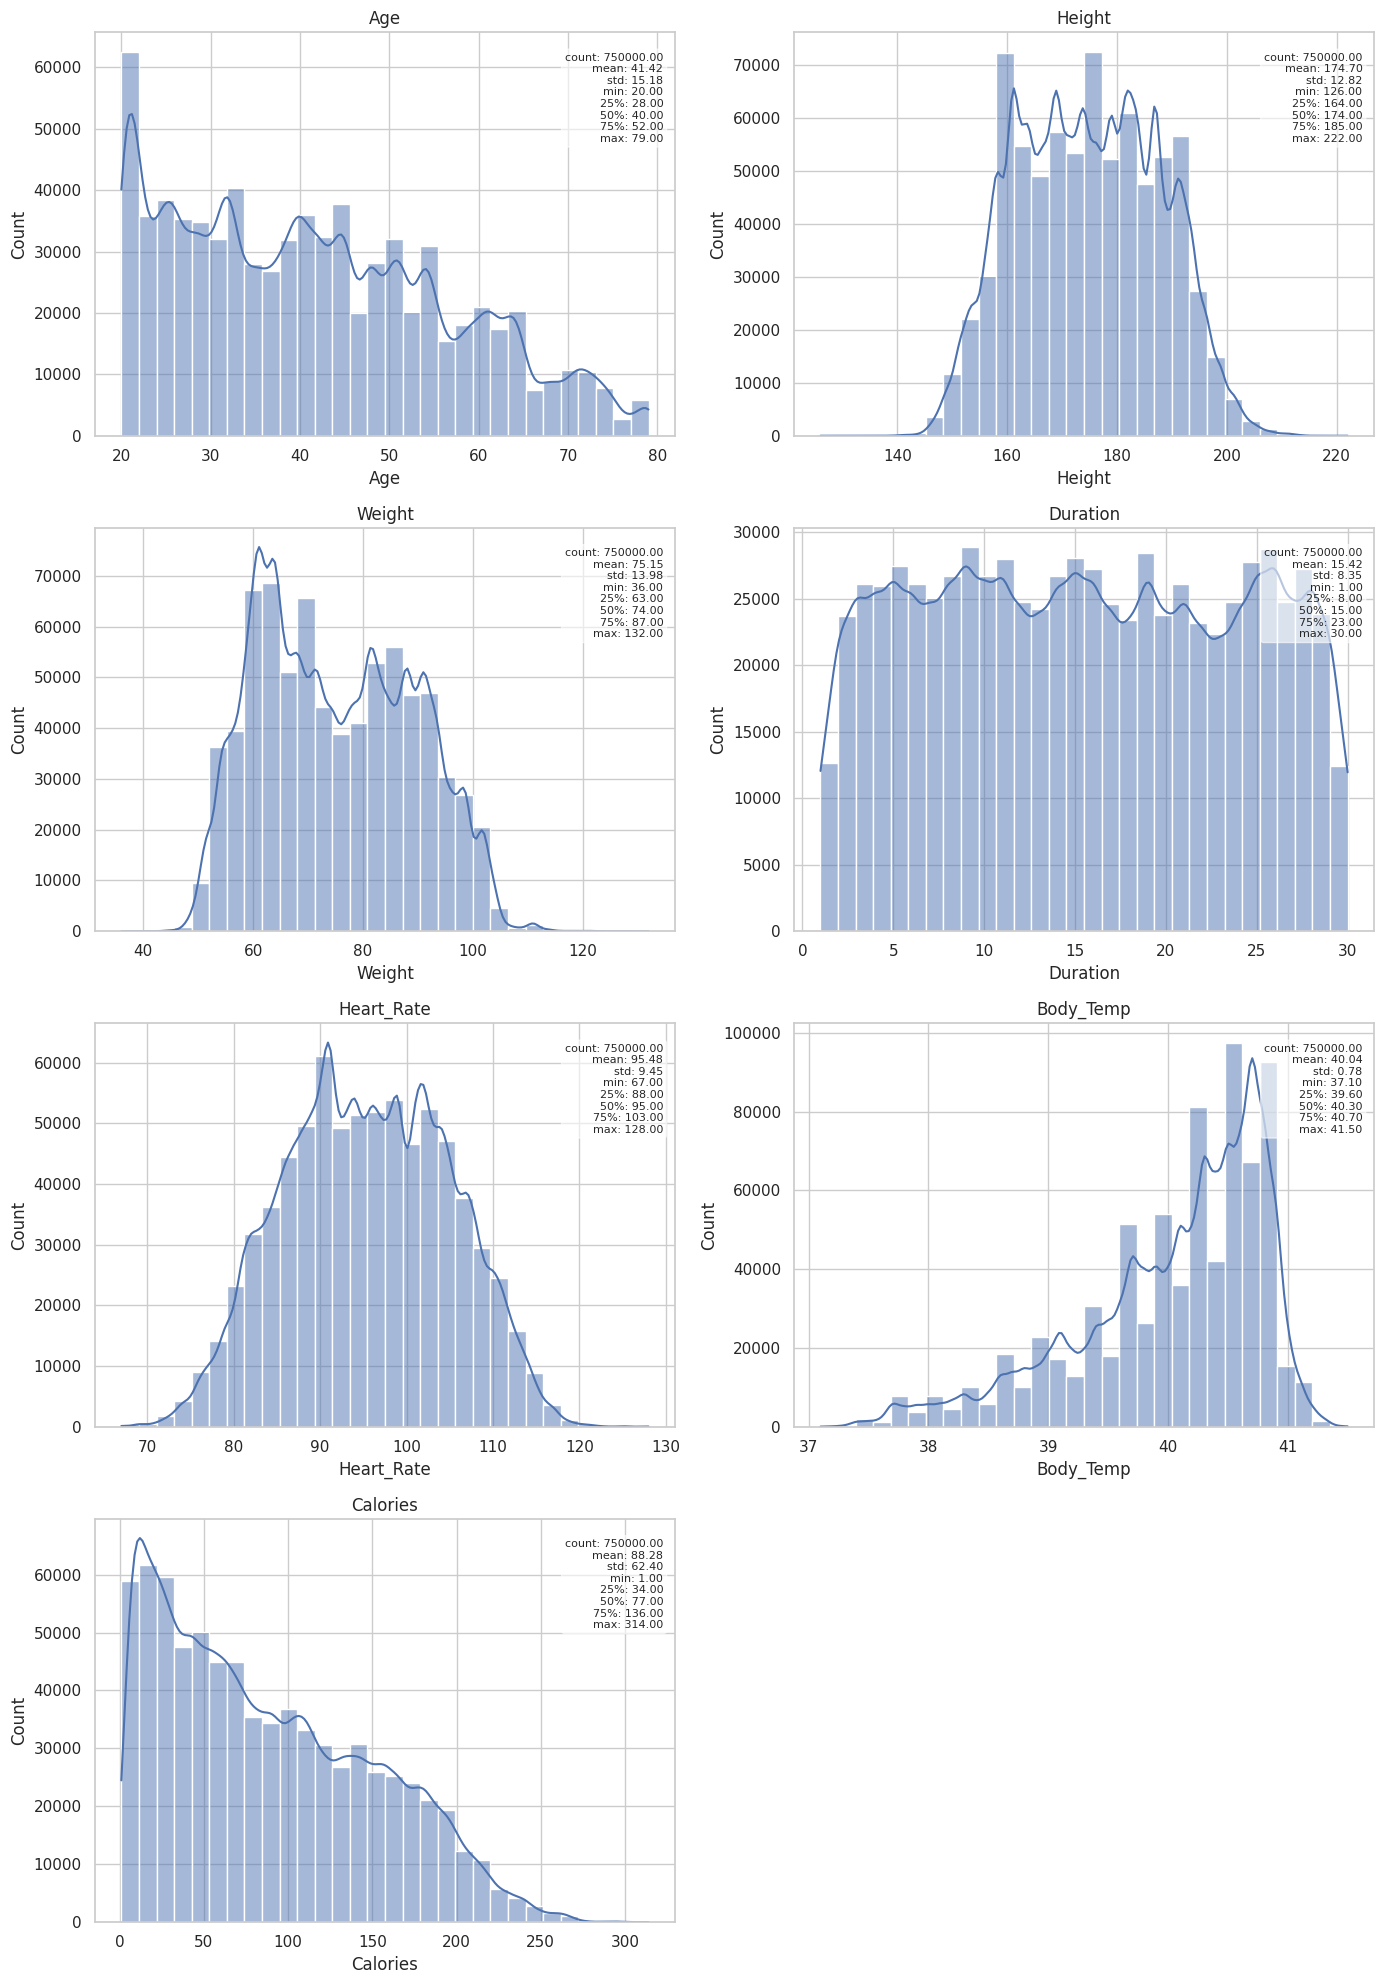

In [26]:
# Plot distributions of numeric variables with describe() stats
cols = train.select_dtypes(include=['float64', 'int64']).drop(columns='id', errors='ignore').columns
n_cols = 2 
n_rows = -(-len(cols) // n_cols)

plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(col)
    stats = '\n'.join(f"{k}: {v:.2f}" for k, v in train[col].describe().items())
    plt.text(0.98, 0.95, stats, transform=plt.gca().transAxes, ha='right', va='top', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

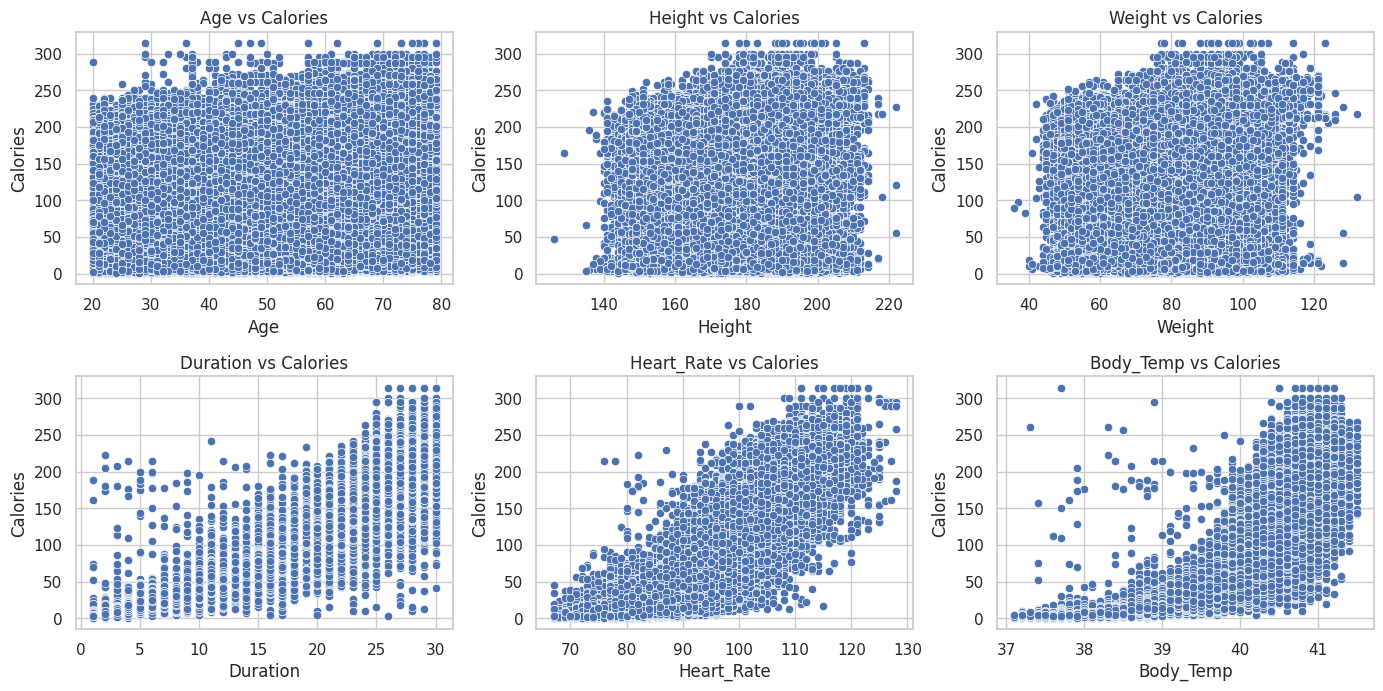

In [27]:
# Plot scatterplots of each feature vs. Calories
plt.figure(figsize=(14, 10))

for i, col in enumerate(train.select_dtypes(include='number').drop(columns=['Calories', 'id']).columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=train[col], y=train['Calories'])
    plt.title(f"{col} vs Calories")

plt.tight_layout()
plt.show()

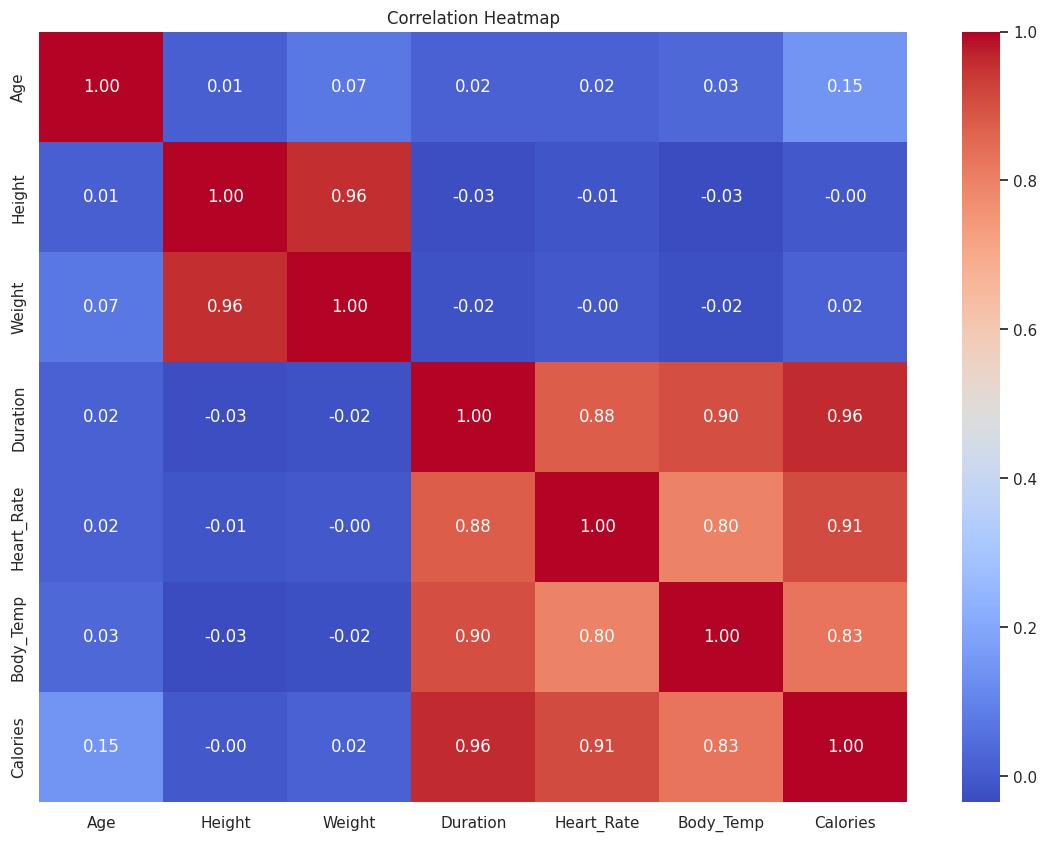

In [29]:
# Correlation Heatmap of numerical columns
numeric_cols = train.select_dtypes(include=['float64', 'int64']).drop(columns='id')
corr = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()